<div style="display: flex; background-color: #ad283b;" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

![title](C:\Users\yannf\OneDrive\SWSetup\Bureau\Cours\Formation_data_analyse\projets\projet_6\ressources/images/lobo_bottleneck.PNG)

<div style="background-color: #c8687a;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">1.1 - Importation des librairies</h3>
</div>

![title](C:\Users\yannf\OneDrive\SWSetup\Bureau\Cours\Formation_data_analyse\projets\projet_6\ressources/images/logo_data_science_librairy.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel( "C:\\Users\\yannf\\OneDrive\\SWSetup\\Bureau\\Cours\\Formation_data_analyse\\projets\\projet_6\\input\\web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("C:\\Users\\yannf\\OneDrive\\SWSetup\\Bureau\\Cours\\Formation_data_analyse\\projets\\projet_6\\input\\erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("C:\\Users\\yannf\\OneDrive\\SWSetup\\Bureau\\Cours\\Formation_data_analyse\\projets\\projet_6\\input\\liaison.xlsx")

C:\Users\yannf\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\yannf\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\yannf\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: #c8687a;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {df_erp.shape[0]} observation(s) ou article(s)")
print(f"Le tableau comporte {df_erp.shape[1]} colonne(s)")

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print(f"Il y a {len(df_erp.loc[df_erp.duplicated()])} doublon dans ce dataframe")

Il y a 0 doublon dans ce dataframe


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print(f"Nombres d'article avec un prix non renseignés: {df_erp['price'].isnull().sum()}")
#Afficher le prix minimum de la colonne "price"
print(df_erp['price'].min())
#Afficher le prix maximum de la colonne "price"
print(df_erp['price'].max())
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp.loc[df_erp['price'] <0]

Nombres d'article avec un prix non renseignés: 0
-20.0
225.0


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
151,4233,0,-20.0,0,outofstock,10.33
469,5017,0,-8.0,0,outofstock,4.34
739,6594,0,-9.1,19,instock,4.61


In [ ]:
#copie du dataframe pour analyser les prix et marges sans prendre en compte les valeurs négatives
df_erp_clean = df_erp.loc[df_erp['price'] > 0].copy()

In [ ]:
#creation d'une colonne 'margin' qui sera la marge effectué sur chaque produit
df_erp_clean['margin']  = round((df_erp_clean['price']/df_erp_clean['purchase_price']-1)*100)

In [ ]:
#calcul de la moyenne et de la mediane pour comparaison
df_erp_clean['margin'].mean()

93.08515815085158

In [ ]:
print(df_erp_clean['margin'].median(),"%")

94.0 %


In [ ]:
#Estimation de la marge des prix aux valeurs négatives dans le cas il s'agirait d'erreurs de saisie
round((abs(df_erp.loc[df_erp['price']<0, 'price']) / df_erp.loc[df_erp['price']<0, 'purchase_price']-1)*100,2)

151    93.61
469    84.33
739    97.40
dtype: float64

In [ ]:
#remplacement des valeurs négatives par la valeur absolue
df_erp.loc[df_erp['price']<0, 'price'] = abs(df_erp.loc[df_erp['price']<0, 'price'])

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print('La quantité minimum est : ', df_erp['stock_quantity'].min())
#Afficher la quantité maximum de la colonne "stock_quantity"
print('La quantité maximum est : ', df_erp['stock_quantity'].max())
#Affichier les stocks inférieurs à 0
print('Nombre de stock inférieur à 0 : ', len(df_erp.loc[df_erp['stock_quantity']< 0]))

La quantité minimum est :  -10
La quantité maximum est :  145
Nombre de stock inférieur à 0 :  2


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp["stock_status"].unique()

array(['instock', 'outofstock'], dtype=object)

In [ ]:
#assignation de la valeur 0 aux quantité inférieur à 0
df_erp.loc[df_erp["stock_quantity"] < 0, "stock_quantity"] = 0

In [ ]:
#verifications des contradictions entre le status du stock et la quantité
#stock à 0 -> status "instock"
df_erp.loc[(df_erp["stock_quantity"] == 0) & (df_erp["stock_status"] != "outofstock")]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
398,4885,1,18.7,0,instock,9.66


In [ ]:
#stock > 0  -> status "outofstock"
df_erp.loc[(df_erp["stock_quantity"] != 0) & (df_erp["stock_status"] == "outofstock")]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
#modifications des champs contradictoires
df_erp.loc[df_erp["stock_quantity"] == 0, "stock_status"] = df_erp["stock_status"].unique()[1]
df_erp.loc[df_erp["stock_quantity"] > 0, "stock_status"] = df_erp["stock_status"].unique()[0]

In [ ]:
#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('Nombre de stock inférieur à 0 : ', len(df_erp.loc[df_erp['stock_quantity']< 0]))

Nombre de stock inférieur à 0 :  0


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()
#valeurs qui peuvent être égale à 0 ou à 1 -> est ce que le produit en question est en vente en ligne ou non

array([1, 0], dtype=int64)

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.1.1.4 - Analyse de la variable PURCHASE_PRICE</h3>
</div>

In [ ]:
#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
df_erp.loc[df_erp['purchase_price'].isnull()]
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix minimum est :", df_erp['purchase_price'].min())
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix maximum est :",df_erp['purchase_price'].max())

Le prix minimum est : 2.74
Le prix maximum est : 137.81


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.2.1 - Dimension, type de données et premiers nettoyages.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
print(f"Le tableau comporte {df_web.shape[0]} observation(s) ou article(s)")
print(f"Le tableau comporte {df_web.shape[1]} colonne(s)")

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [ ]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [ ]:
len(df_web.columns)

29

In [ ]:
#suppression des colonnes qui ne contiennent que la même valeur
for col in df_web.columns :
    count =  df_web[col].nunique()
    if count == 1 :
        df_web.drop(columns=col, inplace = True)

In [ ]:
# suppression de tout ce qui rapporte au 'post'
for col in df_web.columns :
    if 'post' in col and col != 'post_title':
        df_web.drop(columns=col, inplace = True)

In [ ]:
#colonne guide contient des URL dont nous n'aurons pas besoin
df_web['guid'].unique()
df_web.drop(columns=['guid'], inplace=True)

In [ ]:
df_web.columns

Index(['sku', 'total_sales', 'tax_class', 'product_type', 'post_title'], dtype='object')

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.2.2 - Analyse de la variable SKU</h3>
</div>

In [ ]:
#suppression des valeurs manquantes par soucis d'identification
df_web.dropna(how='all', inplace=True)

In [ ]:
#verification après premier nettoyage
print(f"Il y a {len(df_web['sku'].unique())} valeurs uniques pour la colonne SKU")
print(f"Il y a {len(df_web['sku'])} enregistrements pour la colonne SKU")

Il y a 715 valeurs uniques pour la colonne SKU
Il y a 1430 enregistrements pour la colonne SKU


In [ ]:
#suppression des deux derniers enregistrements sans valeur pour le SKU
df_web.dropna(subset=['sku'], inplace=True)

In [ ]:
#suppression de la colonne tax_class
df_web['tax_class'].unique()
df_web.drop(columns=['tax_class'], inplace=True)

In [ ]:
#verification des valeurs dans le dataframe liaison
print(df_liaison.loc[df_liaison['id_web'] == '13127-1'])
print(df_liaison.loc[df_liaison['id_web'] == 'bon-cadeau-25-euros'])

      id_web  product_id
822  13127-1        7247
                  id_web  product_id
443  bon-cadeau-25-euros        4954


In [ ]:
df_web.loc[df_web['sku'] == "13127-1"]

,sku,total_sales,product_type,post_title
272,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
1117,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


In [ ]:
#verification de la non-existence des valeurs de reassignation dans le fichier liaison
print(df_liaison.loc[df_liaison['id_web'] == '13000'])
print(df_liaison.loc[df_liaison['id_web'] == '13128'])

Empty DataFrame
Columns: [id_web, product_id]
Index: []
Empty DataFrame
Columns: [id_web, product_id]
Index: []


In [ ]:
#modifiation du dataframe web pour les valeurs de sku et ajustement dans la table liaison
df_web.loc[df_web['sku'] == "13127-1", "sku"] = "13128"
df_liaison.loc[df_liaison['id_web'] == "13127-1", "id_web"] = "13128"

In [ ]:
df_web.loc[df_web['sku'] == "bon-cadeau-25-euros", "sku"] = "13000"
df_liaison.loc[df_liaison['id_web'] == "bon-cadeau-25-euros", "id_web"] = "13000"

In [ ]:
df_web.loc[df_web['sku'] == "13000", "product_type"] = "Autre"
df_web.loc[(df_web['sku'] == "13128") & (df_web['product_type'] == "Autre"), "sku"] = "13000"

In [ ]:
#modification des valeurs de sku pour pouvoir les ordonner
df_web['sku'] = pd.to_numeric(df_web['sku'], errors="ignore")

In [ ]:
#triage du dataframe par valeur de SKU
df_web.sort_values('sku', ascending=True, inplace=True)

In [ ]:
#modification de l'index après triage
df_web.index = list(range(1,len(df_web)+1))
df_web.head(5)

,sku,total_sales,product_type,post_title
1,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs
2,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs
3,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...
4,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...
5,304,8.0,Champagne,Champagne Gosset Grande Réserve


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.2.3 - Analyse de la variable total_sales</h3>
</div>

In [ ]:
#division en 2 dataframe 'identique' pour trouver les valeurs de 'total_sales' qui sont différentes
half1_web = df_web[df_web.index.isin(list(range(1, len(df_web)+1,2)))].copy()
half2_web = df_web[df_web.index.isin(list(range(2, len(df_web)+1,2)))].copy()

In [ ]:
#ajout d'une colonne "total_sales_2" pour comparaison avec "total_sales
half2_web["total_sales_2"] = half1_web["total_sales"].values
half2_web.query("total_sales != total_sales_2")

,sku,total_sales,product_type,post_title,total_sales_2
32,1366,6.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,116.0
392,14561,11.0,Vin,Argentine Mendoza Alamos Torrontes 2017,111.0
508,14950,22.0,Vin,François Baur Pinot Noir Schlittweg 2017,122.0
698,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017,2.0


In [ ]:
#verification de la moyenne et du maximum pour arbitrage
print(f"La moyenne de vente est : {round(half2_web['total_sales'].mean(),2)} ")
print(f"Le maximum de vente est : {round(half2_web['total_sales'].max(),2)} ")

La moyenne de vente est : 8.08 
Le maximum de vente est : 36.0 


In [ ]:
#choix de garder les valeurs de vente de la colonne 'total_sales' et suppression de 'total_sales_2'
half2_web.drop(columns={"total_sales_2"}, inplace=True)
df_web = half2_web.copy()

In [ ]:
#dernière modification pour éviter les ventes avec des chiffres décimaux
df_web["total_sales"] = df_web["total_sales"].astype("int64")
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 2 to 1428
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sku           714 non-null    int64 
 1   total_sales   714 non-null    int64 
 2   product_type  714 non-null    object
 3   post_title    714 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.9+ KB


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
print(f'Le fichier liaison contient {df_liaison.shape[0]} lignes et {df_liaison.shape[1]} colonnes')

Le fichier liaison contient 825 lignes et 2 colonnes


In [ ]:
#Pas le même nombre d'identifiants, il a donc nécessairement certains produits qui sont en stock mais pas en vente en ligne
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
#autant de valeurs uniques que de valeurs non-nulles, il n'y a donc pas de doublons dans le dataframe
print(f'La colonne id_web contient {len(df_liaison["id_web"].unique())} valeurs uniques')
print(f'La colonne product_id contient {len(df_liaison["product_id"].unique())-1} valeurs uniques')

La colonne id_web contient 735 valeurs uniques
La colonne product_id contient 824 valeurs uniques


In [ ]:
df_liaison.loc[df_liaison["id_web"].notna(), "id_web"]

0        15298
1        15296
2        15300
3        19814
4        19815
        ...   
792      15891
793      15887
822      13128
823    14680-1
824      16230
Name: id_web, Length: 734, dtype: object

In [ ]:
#modification d'un des identifiants de id_web pour ne garder que des valeurs de type int64 (aucune vente pour cet identifiant dans le fichier web)
df_liaison.loc[df_liaison["id_web"] == "14680-1", "id_web"] = "14681"

In [ ]:
df_liaison["id_web"] = pd.to_numeric(df_liaison["id_web"], errors="raise")

<div style="background-color: #c8687a;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
erp_liaison = pd.merge(df_erp, df_liaison, on="product_id", how="inner")

In [ ]:
#comme prévu, certaines valeurs de id_web n'ont pas de correspondance puisque tous les articles du stocks ne sont pas en ventes en ligne
erp_liaison.loc[erp_liaison["id_web"].isna()]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
19,4055,0,86.1,0,outofstock,37.88,NaN
49,4090,0,73.0,0,outofstock,33.79,NaN
50,4092,0,47.0,0,outofstock,25.25,NaN
119,4195,0,14.1,0,outofstock,7.36,NaN
131,4209,0,73.5,0,outofstock,33.01,NaN
...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,31.20,NaN
818,7200,0,31.0,6,instock,15.54,NaN
819,7201,0,31.0,18,instock,16.02,NaN
820,7203,0,45.0,30,instock,23.48,NaN


In [ ]:
#affichage de product "onsale_web" = 0 avec un id_web
erp_liaison.loc[(erp_liaison["onsale_web"] == 0) & (erp_liaison["id_web"].notna()), ["product_id", "onsale_web", "price", "id_web"]]

,product_id,onsale_web,price,id_web
123,4200,0,5.8,16295.0
193,4289,0,22.8,13771.0
236,4568,0,21.5,15065.0
241,4584,0,32.3,14785.0
355,4741,0,12.4,12601.0
391,4864,0,8.3,15154.0
394,4869,0,17.2,14360.0
424,4921,0,13.8,15608.0
425,4922,0,21.5,15586.0
470,5018,0,15.4,15272.0


In [ ]:
#affichage de product "onsale_web" = 1 sans id_web
erp_liaison.loc[(erp_liaison["onsale_web"] != 0) & (erp_liaison["id_web"].isna()), ["product_id", "onsale_web", "price", "id_web"]]

,product_id,onsale_web,price,id_web
242,4594,1,144.0,NaN
486,5070,1,84.7,NaN
487,5075,1,43.3,NaN


In [ ]:
#modifications de certains produits qui sont indiqués comme en vente sur le web mais ce n'est pas le cas et inversement
erp_liaison.loc[(erp_liaison["onsale_web"] != 0) & (erp_liaison["id_web"].isna()) , "onsale_web"] = 0
erp_liaison.loc[(erp_liaison["onsale_web"] == 0) & (erp_liaison["id_web"].notna()), "onsale_web"] = 1

In [ ]:
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 51.6+ KB


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 3.2 - Jonction du fichier erp_liaison et df_web</h3>
</div>

In [ ]:
#jointure de l'assemblage de df_erp/df_liaison et de df_web
df = pd.merge(erp_liaison, df_web, left_on="id_web", right_on="sku", how="left", indicator=True)
# df.drop(columns={"id_web"}, inplace=True)

In [ ]:
#modification d'un produit qui était n'était pas noté comme en vente sur le web mais a tout de même était vendu
df.loc[(df["onsale_web"]==0) & (df["sku"].notna()), "onsale_web"] = 1

In [ ]:
#certains produits ont un identifiants web mais n'ont pas d'identifiants SKU correspondant
df.loc[(df["id_web"].notna()) & (df["sku"].isna())]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,_merge
193,4289,1,22.8,0,outofstock,11.90,13771.0,NaN,NaN,NaN,NaN,left_only
236,4568,1,21.5,0,outofstock,11.22,15065.0,NaN,NaN,NaN,NaN,left_only
241,4584,1,32.3,0,outofstock,17.36,14785.0,NaN,NaN,NaN,NaN,left_only
355,4741,1,12.4,0,outofstock,6.66,12601.0,NaN,NaN,NaN,NaN,left_only
391,4864,1,8.3,0,outofstock,9.99,15154.0,NaN,NaN,NaN,NaN,left_only
394,4869,1,17.2,0,outofstock,9.33,14360.0,NaN,NaN,NaN,NaN,left_only
424,4921,1,13.8,0,outofstock,7.13,15608.0,NaN,NaN,NaN,NaN,left_only
425,4922,1,21.5,0,outofstock,10.55,15586.0,NaN,NaN,NaN,NaN,left_only
470,5018,1,15.4,0,outofstock,7.72,15272.0,NaN,NaN,NaN,NaN,left_only
473,5021,1,17.1,0,outofstock,8.92,15630.0,NaN,NaN,NaN,NaN,left_only


In [ ]:
#Total de produit pas en vente sur le web officiellement (malgré certaines contradictions dans la colonne onsale_web)
len(df.loc[df["total_sales"].isna()])

111

<div style="background-color: #c8687a;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [ ]:
avg_price = df['price'].mean()
med_price = df['price'].median()

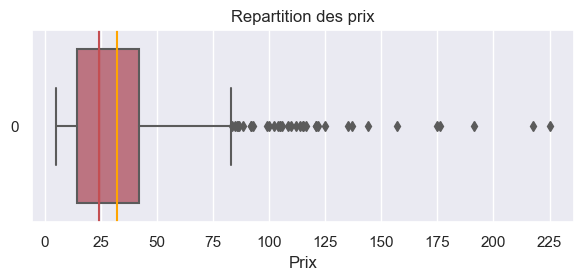

In [ ]:
sns.set_theme(rc={'figure.figsize':(7,2.5)})
sns.boxplot(df['price'], orient='h', color ="#c8687a", medianprops={"color": "r", "linewidth": 1}).set_title('Repartition des prix')
plt.axvline(avg_price, color="orange")
plt.axvline(med_price, color="r")
plt.xlabel("Prix")
plt.xticks(ticks = list(range(0,250,25)))
plt.show()

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

La moyenne de prix est 32.42€
L'écart-type est de 26.8€


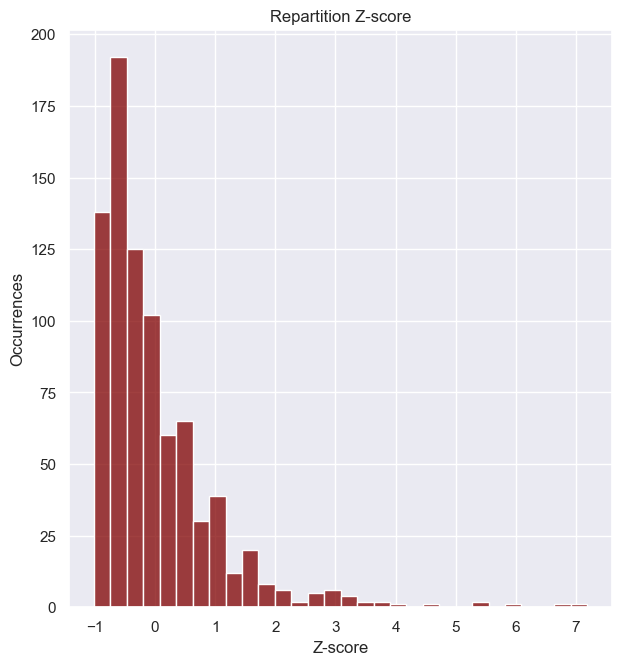

In [ ]:
#Calculer la moyenne du prix
print(f"La moyenne de prix est {round(df['price'].mean(),2)}€")
#Calculer l'écart-type du prix
print(f"L'écart-type est de {round(df['price'].std(),2)}€")
#Calculer le Z-score
df['z_score'] = (df['price']-df['price'].mean())/ df['price'].std()
sns.set_theme(rc={'figure.figsize':(7,7.5)})
sns.histplot(df['z_score'], bins=30, color ="maroon").set_title("Repartition Z-score")
plt.xticks(ticks = list(range(-1,8)))
plt.xlabel("Z-score")
plt.ylabel("Occurrences")
plt.show()

In [ ]:
df.loc[df["price"] ==225, "post_title"]

677    Champagne Egly-Ouriet Grand Cru Millésimé 2008
Name: post_title, dtype: object

In [ ]:
#A partir de quel prix dépasse t'on un Z-score de 3 ?
print(f"Les prix qui ont un Z-score supérieur à 3 ont une valeur minimale de {round(df['price'].mean() + 3*df['price'].std(),2)}€")

Les prix qui ont un Z-score supérieur à 3 ont une valeur minimale de 112.09€


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
df['price'].describe()

count    825.000000
mean      32.277636
std       26.603196
min        5.200000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [ ]:
outlier_threshold = 2

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
nb_outlier = len(df.loc[(df['price'] <=Q1-1.5*IQR) | (df['price'] >=Q3+1.5*IQR), ["product_id", "price", "purchase_price", "z_score"]])
print(f"Il y a {nb_outlier} valeurs de prix abérrantes sur les {len(df)} dans le catalogue, cela equivaut à {round(nb_outlier/len(df)*100,2)}% des produits.")

Il y a 36 valeurs de prix abérrantes sur les 825 dans le catalogue, cela equivaut à 4.36% des produits.


In [ ]:
# On peut créer la colonne marge pour voir si certains de ces prix sont très éloignés du prix d'achat renseigné
df['margin'] = round(((df['price'] / df['purchase_price'])-1)*100,2)
df.loc[(df['price'] <=Q1-1.5*IQR) | (df['price'] >=Q3+1.5*IQR)]
#On peut également remarquer dans le titre du post que tous les produits concernés sont des grands crus ce qui peut justifier le prix plus élevé

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,_merge,z_score,margin
19,4055,0,86.1,0,outofstock,37.88,NaN,NaN,NaN,NaN,NaN,left_only,2.023154,127.30
66,4115,1,100.0,12,instock,52.70,15382.0,15382.0,1.0,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,both,2.545648,89.75
68,4132,1,88.4,7,instock,44.30,11668.0,11668.0,5.0,Vin,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,both,2.109610,99.55
208,4352,1,225.0,0,outofstock,137.81,15940.0,15940.0,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,both,7.244331,63.27
214,4359,1,85.6,112,instock,51.93,13853.0,13853.0,7.0,Champagne,Champagne Larmandier-Bernier Grand Cru Les Che...,both,2.004359,64.84
227,4402,1,176.0,11,instock,78.25,3510.0,3510.0,3.0,Cognac,Cognac Frapin VIP XO,both,5.402447,124.92
228,4404,1,108.5,17,instock,52.22,3507.0,3507.0,4.0,Cognac,Cognac Frapin Château de Fontpinot XO,both,2.865158,107.77
230,4406,1,157.0,12,instock,69.08,7819.0,7819.0,4.0,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans...,both,4.688247,127.27
231,4407,1,104.0,14,instock,46.71,3509.0,3509.0,5.0,Cognac,Cognac Frapin Cigar Blend,both,2.696006,122.65
240,4582,1,109.6,18,instock,53.80,12857.0,12857.0,1.0,Vin,Château de Meursault Puligny-Montrachet 1er Cr...,both,2.906507,103.72


<div style="background-color: #c8687a;" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################
#Créez une colonne calculant le CA par article
df["GS_article"] = df["total_sales"] * df["price"]
#Calculez la somme de la colonne "ca_par_article"
print(f"Le site web a généré {df['GS_article'].sum()}€ de chiffre d'affaire en octobre")
#Ce résultat correspond au chiffre d'affaire du site web


Le site web a généré 144878.1€ de chiffre d'affaire en octobre


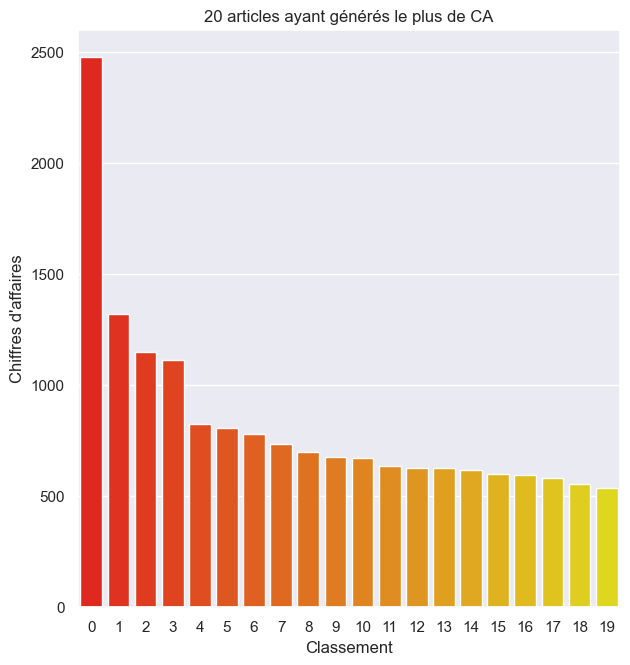

In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df
df.sort_values(["GS_article"], ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df.reset_index(inplace=True, drop=True)
#Afficher les 20 premier articles en CA
df.loc[df.index < 20, ["price", "purchase_price","total_sales", "post_title", "z_score", "margin", "GS_article"]]
#Graphique en barre des 20 premiers articles avec plotly express
fig = sns.barplot(data=df.loc[df.index < 20], y="GS_article", x=df.loc[df.index < 20].index,palette ="autumn")
fig.set_title("20 articles ayant générés le plus de CA")
plt.xlabel("Classement")
plt.ylabel("Chiffres d'affaires")
plt.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df["prop_GS"] = df["GS_article"]/ df["GS_article"].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df["cumul_prop_GS"] = df["prop_GS"].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print(f"{len(df.loc[df['cumul_prop_GS']<=0.8])} articles représentent 80% du chiffres d'affaires de Bottleneck")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f"Cela correspond à {round((len(df.loc[df['cumul_prop_GS']<=0.8]) / len(df))*100,2)} % des articles")

432 articles représentent 80% du chiffres d'affaires de Bottleneck
Cela correspond à 52.36 % des articles


<div style="border: 1px solid  #c8687a;" >
<h3 style="margin: auto; padding: 20px; color:  #c8687a; ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

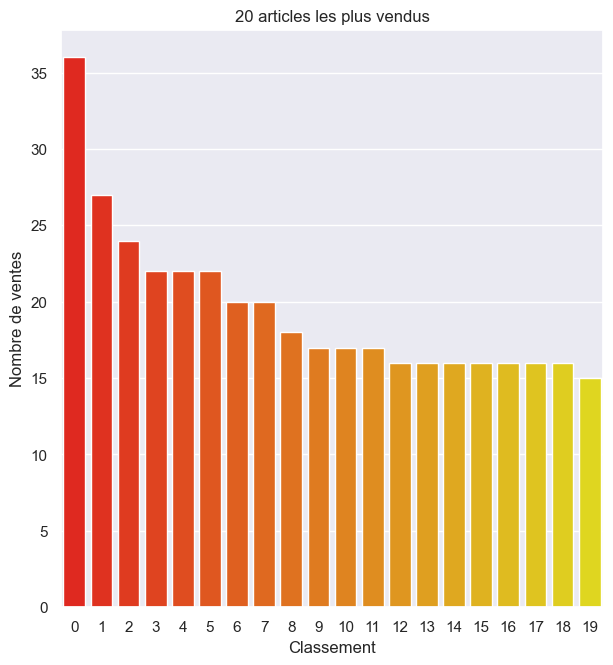

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df.sort_values("total_sales", ascending = False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df.reset_index(inplace=True, drop=True)
#Afficher les 20 premier articles en quantité
df.loc[df.index <20, ["product_id", "stock_quantity", "total_sales", "GS_article"]]
#Graphique en barre des 20 premiers articles avec plotly express
sns.barplot(data=df.loc[df.index < 20], y="total_sales", x=df.loc[df.index < 20].index,palette ="autumn").set_title("20 articles les plus vendus")
plt.xlabel("Classement")
plt.ylabel("Nombre de ventes")
plt.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df["prop_quantity"] = df["total_sales"]/ df["total_sales"].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df["cumul_prop_quantity"] = df["prop_quantity"].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print(f"{len(df.loc[df['cumul_prop_quantity'] <0.8, 'product_id'])} articles représentent environ 80% des ventes")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f"Cela equivaut à {round(len(df.loc[df['cumul_prop_quantity'] <0.8, 'product_id'])/len(df)*100,2)}% des articles du catalogue")

433 articles représentent environ 80% des ventes
Cela equivaut à 52.48% des articles du catalogue


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 5.3 - Analyse des stocks</h3>
</div>

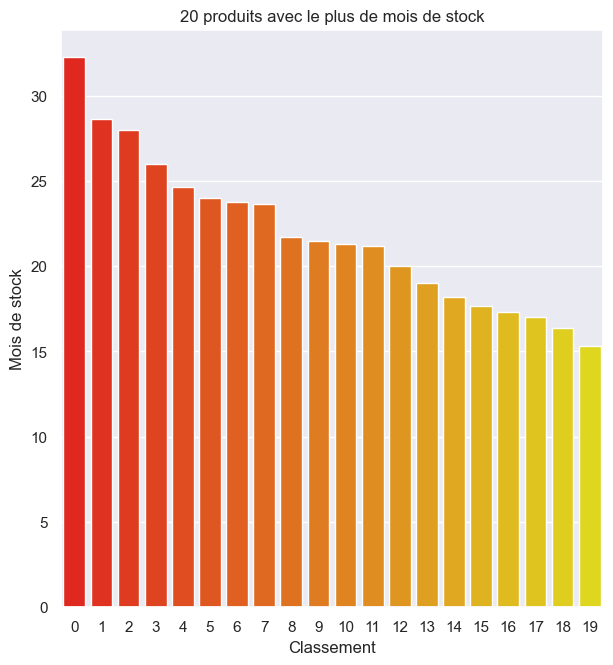

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock
df["previous_stock"] = df["stock_quantity"] + df["total_sales"]
df["stock_rotation"] = df["previous_stock"] / df["total_sales"]
#Remplacement des "inf" par 0
df.replace(to_replace = np.inf, value = 0, inplace=True)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df.sort_values("stock_rotation", ascending= False, inplace=True)
df.reset_index(inplace=True, drop=True)
#Graphique en barre du top 20 des produits qui ont le plus de mois de stock
fig = sns.barplot(data=df.loc[df.index < 20], y="stock_rotation", x=df.loc[df.index < 20].index, palette ="autumn")
fig.set_title("20 produits avec le plus de mois de stock")
plt.xlabel("Classement")
plt.ylabel("Mois de stock")
plt.show()

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df["euro_stock"] = df["stock_quantity"] * df["price"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
print(f"Les {len(df)} produits du stock représentent un total de {df['euro_stock'].sum()}€ de marchandises.")

Les 825 produits du stock représentent un total de 532119.1€ de marchandises.


In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print(f"Le cumul de tous les produits représente {df['stock_quantity'].sum()} articles.")

Le cumul de tous les produits représente 17822 articles.


<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df["VAT_price"] = df["purchase_price"]/1.2
#Création de la colonne Taux de marge
df["margin"] = round((df["price"]/df["VAT_price"]-1)*100,1)
#Afficher le prix minimum de la colonne "taux_marge"
print(f"Le taux de marge minimum est {round(df['margin'].min()*100, 2)}%")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"Le taux de marge maximum est {round(df['margin'].max()*100, 2)}%")

Le taux de marge minimum est -30.0%
Le taux de marge maximum est 17560.0%


In [ ]:
#affichage de la ligne avec marge négative
df.loc[df["margin"] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,...,margin,GS_article,prop_GS,cumul_prop_GS,prop_quantity,cumul_prop_quantity,previous_stock,stock_rotation,euro_stock,VAT_price
690,4355,1,12.65,97,instock,77.48,12589.0,12589.0,0.0,Champagne,...,-80.4,0.0,0.0,1.0,0.0,1.0,97.0,0.0,1227.05,64.566667
741,4864,1,8.30,0,outofstock,9.99,15154.0,NaN,NaN,NaN,...,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,8.325000


In [ ]:
#affichage des prix avec 2 chiffres après la virgules
df.loc[df["price"]*10%1 >0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,...,margin,GS_article,prop_GS,cumul_prop_GS,prop_quantity,cumul_prop_quantity,previous_stock,stock_rotation,euro_stock,VAT_price
75,4156,1,20.35,44,instock,10.30,14941.0,14941.0,13.0,Vin,...,137.1,264.55,0.001826,0.415493,0.002253,0.221972,57.0,4.384615,895.40,8.583333
197,5900,1,18.25,21,instock,8.96,12869.0,12869.0,7.0,Vin,...,144.4,127.75,0.000882,0.874850,0.001213,0.759660,28.0,4.000000,383.25,7.466667
332,4076,1,14.05,32,instock,6.90,13072.0,13072.0,13.0,Vin,...,144.3,182.65,0.001261,0.671687,0.002253,0.163403,45.0,3.461538,449.60,5.750000
666,4976,1,16.45,0,outofstock,8.07,16005.0,16005.0,7.0,Vin,...,144.6,115.15,0.000795,0.916771,0.001213,0.751170,7.0,1.000000,0.00,6.725000
690,4355,1,12.65,97,instock,77.48,12589.0,12589.0,0.0,Champagne,...,-80.4,0.00,0.000000,1.000000,0.000000,1.000000,97.0,0.000000,1227.05,64.566667


In [ ]:
#seulement 5 produits sur 815 qui ont 2 chiffres après la virgules, correction du produit "4355" et recalcul de la marge
df.loc[df["product_id"] == 4355, "price"] *=10
df["margin"] = round((df["price"]/df["VAT_price"]-1)*100,1)

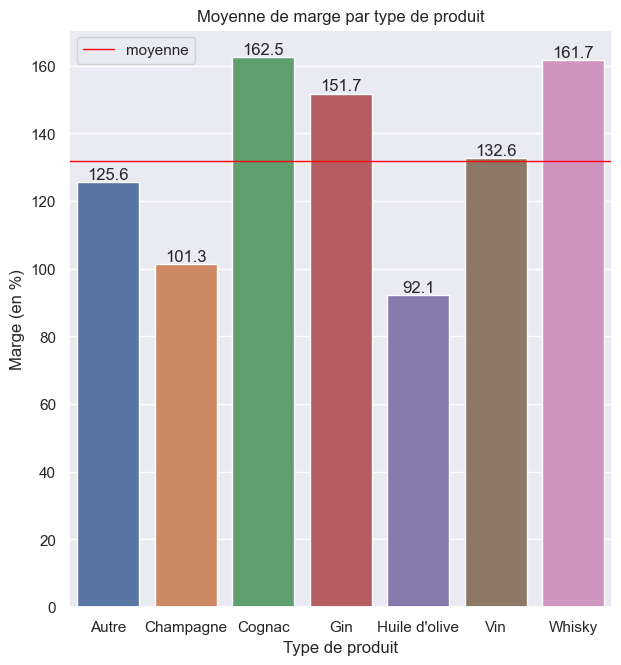

In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit
avg_margin = df['margin'].mean()
df_margin_type = df.copy()
df_margin_type = df_margin_type.groupby(["product_type"], as_index=False)["margin"].mean().round(1)
#Affichage dans un graphique du taux de marge par type de produit
fig = sns.barplot(data= df_margin_type, x="product_type", y = "margin", errorbar=None)
fig.axhline(y=avg_margin, linewidth=1, color='red', label="moyenne")
label = ["moyenne"]
handles, _ = fig.get_legend_handles_labels()
fig.set_title("Moyenne de marge par type de produit")
fig.bar_label(fig.containers[0], label_type='edge')
plt.xlabel("Type de produit")
plt.ylabel("Marge (en %)")
plt.legend(handles = handles[1:], labels= label)
plt.show()

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

<div style="border: 1px solid #c8687a;" >
<h3 style="margin: auto; padding: 20px; color: #c8687a; ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>